<a href="https://colab.research.google.com/github/leburik12/machine_learning_jupyte_notebooks/blob/main/Loan_Eligibility_Prediction_using_Logistic_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [62]:
import pandas as pd
import numpy as np
from google.colab import drive
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [10]:
file_path = '/content/drive/MyDrive/ml_data/loan-test.csv'

In [82]:
df = pd.read_csv(file_path)
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001015,Male,Yes,0,Graduate,No,5720,0,110.0,360.0,1.0,Urban,1.0
1,LP001022,Male,Yes,1,Graduate,No,3076,1500,126.0,360.0,1.0,Urban,1.0
2,LP001031,Male,Yes,2,Graduate,No,5000,1800,208.0,360.0,1.0,Urban,1.0
3,LP001035,Male,Yes,2,Graduate,No,2340,2546,100.0,360.0,NaN,Urban,NaN
4,LP001051,Male,No,0,Not Graduate,No,3276,0,78.0,360.0,1.0,Urban,1.0


In [83]:
missing_values = df.isnull().sum().sort_values(ascending=False)
missing_values

,0
Loan_Status,29
Credit_History,29
Self_Employed,23
Gender,11
Dependents,10
Loan_Amount_Term,6
LoanAmount,5
Loan_ID,0
Married,0
Education,0


In [84]:
missing_values[missing_values > 0]

,0
Loan_Status,29
Credit_History,29
Self_Employed,23
Gender,11
Dependents,10
Loan_Amount_Term,6
LoanAmount,5


In [85]:
df['Loan_Amount_Term'].value_counts(dropna=False)

,count
Loan_Amount_Term,
360.0,311
180.0,22
480.0,8
300.0,7
NaN,6
240.0,4
84.0,3
60.0,1
12.0,1


In [86]:
'''
 impute loan_amount_term
 Since 360.0 got 311 occurrences
 by far the most common loan term — almost 80% of the dataset.
 we will use mode without introducing a bias
'''
most_common_loan_amount_term = df['Loan_Amount_Term'].mode()[0]

In [18]:
most_common_loan_amount_term

np.float64(360.0)

In [87]:
df['Loan_Amount_Term'].fillna(most_common_loan_amount_term, inplace=True)

/tmp/ipython-input-87-2512440238.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Loan_Amount_Term'].fillna(most_common_loan_amount_term, inplace=True)


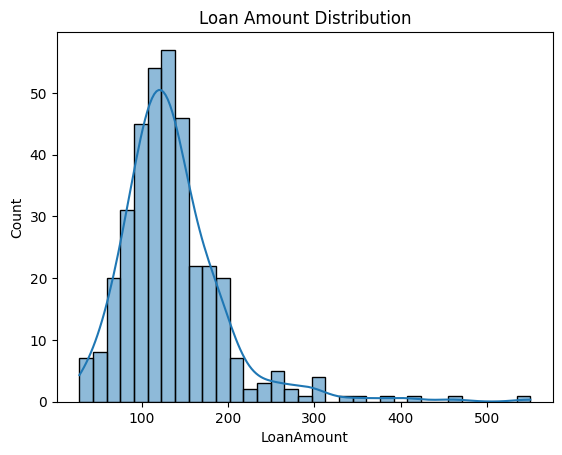

In [88]:
'''
 impute LoanAmount
 check if their is an outlier in the dataset
  skewness tells us about the direction of outliers
  Tail extends to the right, most data clustered on the left.

  so we use : Median Imputation
  since median is the middle value in a sorted dataset,
  making it robust to outliers and skewed distributions.
  It remains closer to the true center of the bulk of your data,
  thus preserving the shape of the distribution far better than the mean.
'''
sns.histplot(df['LoanAmount'], kde=True)
plt.title("Loan Amount Distribution")
plt.show()

In [89]:
'''
  Tail extends to the right, most data clustered on the left.

  so we use : Median Imputation
  since median is the middle value in a sorted dataset,
  making it robust to outliers and skewed distributions.
  It remains closer to the true center of the bulk of your data,
  thus preserving the shape of the distribution far better than the mean.
'''

median_load_amount = df['LoanAmount'].median()
df['LoanAmount'].fillna(median_load_amount, inplace=True)

/tmp/ipython-input-89-3933750072.py:12: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['LoanAmount'].fillna(median_load_amount, inplace=True)


In [90]:
'''
Dependents imputation
'''

df['Dependents'].value_counts(dropna=False)

,count
Dependents,
0,200
2,59
1,58
3+,40
NaN,10


In [91]:
missing_indices = df[df['Dependents'].isna()].index

In [92]:
missing_indices

Index([46, 70, 111, 138, 202, 247, 251, 265, 302, 312], dtype='int64')

In [93]:
# Replace missing values by sampling from the observed distribution:
dependents_dist = df['Dependents'].dropna().value_counts(normalize=True)
dependents_dist

,proportion
Dependents,
0,0.560224
2,0.165266
1,0.162465
3+,0.112045


In [94]:
# Generate random values based on that distribution
missing_indices = df[df['Dependents'].isna()].index
missing_indices

Index([46, 70, 111, 138, 202, 247, 251, 265, 302, 312], dtype='int64')

In [95]:
imputed_values = np.random.choice(dependents_dist.index, size=len(missing_indices), p=dependents_dist.values)

In [96]:
df.loc[missing_indices, 'Dependents'] = imputed_values

In [97]:
# impute gender column categorical
df['Gender'].value_counts(dropna=False)

,count
Gender,
Male,286
Female,70
NaN,11


In [98]:
# Replace missing values by sampling from the observed distribution:
gender_dist = df['Gender'].dropna().value_counts(normalize=True)

missing_indices = df[df['Gender'].isna()].index

imputed_genders = np.random.choice(gender_dist.index, size=len(missing_indices), p=gender_dist.values)
df.loc[missing_indices, 'Gender'] = imputed_genders

In [41]:
print(df['Credit_History'].value_counts())

Credit_History
1.0    279
0.0     59
Name: count, dtype: int64


In [99]:
# impute gender column Self_Employed
self_emp_dist = df['Self_Employed'].dropna().value_counts(normalize=True)
self_emp_dist

,proportion
Self_Employed,
No,0.892442
Yes,0.107558


In [100]:
# Sample based on observed distribution
missing_self_emp = df[df['Self_Employed'].isna()].index
missing_self_emp

Index([  8,  11,  13,  36,  72,  89, 142, 161, 168, 175, 192, 243, 255, 259,
       276, 278, 285, 287, 294, 297, 301, 323, 326],
      dtype='int64')

In [101]:
imputed_self_emp = np.random.choice(self_emp_dist.index, size=len(missing_self_emp), p=self_emp_dist.values)
imputed_self_emp

array(['No', 'No', 'No', 'No', 'No', 'Yes', 'No', 'No', 'No', 'No', 'No',
       'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'Yes', 'No', 'No',
       'No'], dtype=object)

In [102]:
# Fill missing values
df.loc[missing_self_emp, 'Self_Employed'] = imputed_self_emp

In [103]:
# Get observed (non-null) value distribution
credit_dist = df['Credit_History'].dropna().value_counts(normalize=True)
credit_dist

,proportion
Credit_History,
1.0,0.825444
0.0,0.174556


In [105]:
# Identify missing positions
missing_credit = df[df['Credit_History'].isna()].index
missing_credit

Index([  3,  12,  26,  28,  45,  90,  99, 104, 115, 139, 143, 164, 177, 179,
       185, 202, 220, 259, 262, 265, 282, 286, 305, 329, 336, 351, 358, 360,
       364],
      dtype='int64')

In [106]:
# Sample from the empirical distribution
imputed_credit = np.random.choice(credit_dist.index, size=len(missing_credit), p=credit_dist.values)
imputed_credit

array([0., 1., 1., 1., 0., 1., 1., 1., 0., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 0., 1., 0., 1., 1., 1., 1., 1., 0.])

In [107]:
df.loc[missing_credit, 'Credit_History'] = imputed_credit

In [108]:
# Get observed (non-null) value distribution
load_status_dist= df['Loan_Status'].dropna().value_counts(normalize=True)
load_status_dist

,proportion
Loan_Status,
1.0,0.825444
0.0,0.174556


In [109]:
# Identify missing positions
missing_loan_status = df[df['Loan_Status'].isna()].index

In [110]:
# Sample from the empirical distribution
imputed_loan_status = np.random.choice(load_status_dist.index, size=len(missing_loan_status), p=load_status_dist.values)

In [111]:
#  Fill missing values
df.loc[missing_loan_status, 'Loan_Status'] = imputed_loan_status

In [112]:
missing_values = df.isnull().sum().sort_values(ascending=False)
missing_values

,0
Loan_ID,0
Gender,0
Married,0
Dependents,0
Education,0
Self_Employed,0
ApplicantIncome,0
CoapplicantIncome,0
LoanAmount,0
Loan_Amount_Term,0


In [113]:
labelencoder = LabelEncoder()

In [114]:
# Label Encoding Binary Features
binary_cols = ['Gender', 'Married', 'Education', 'Self_Employed']

for col in binary_cols:
  df[col] = labelencoder.fit_transform(df[col])

In [115]:
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001015,1,1,0,0,0,5720,0,110.0,360.0,1.0,Urban,1.0
1,LP001022,1,1,1,0,0,3076,1500,126.0,360.0,1.0,Urban,1.0
2,LP001031,1,1,2,0,0,5000,1800,208.0,360.0,1.0,Urban,1.0
3,LP001035,1,1,2,0,0,2340,2546,100.0,360.0,0.0,Urban,1.0
4,LP001051,1,0,0,1,0,3276,0,78.0,360.0,1.0,Urban,1.0


In [117]:
# One-Hot Encoding for Property_Area
# df = pd.get_dummies(df, columns=['Property_Area'], prefix='PropArea')
df_dummies = pd.get_dummies(df, columns=['Property_Area'], prefix='PropArea')

In [118]:
df_dummies

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Loan_Status,PropArea_Rural,PropArea_Semiurban,PropArea_Urban
0,LP001015,1,1,0,0,0,5720,0,110.0,360.0,1.0,1.0,False,False,True
1,LP001022,1,1,1,0,0,3076,1500,126.0,360.0,1.0,1.0,False,False,True
2,LP001031,1,1,2,0,0,5000,1800,208.0,360.0,1.0,1.0,False,False,True
3,LP001035,1,1,2,0,0,2340,2546,100.0,360.0,0.0,1.0,False,False,True
4,LP001051,1,0,0,1,0,3276,0,78.0,360.0,1.0,1.0,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
362,LP002971,1,1,3+,1,1,4009,1777,113.0,360.0,1.0,1.0,False,False,True
363,LP002975,1,1,0,0,0,4158,709,115.0,360.0,1.0,1.0,False,False,True
364,LP002980,1,0,0,0,0,3250,1993,126.0,360.0,0.0,0.0,False,True,False
365,LP002986,1,1,0,0,0,5000,2393,158.0,360.0,1.0,1.0,True,False,False


In [119]:
dummy_cols = [col for col in df_dummies.columns if col.startswith('PropArea_')]
dummy_cols

['PropArea_Rural', 'PropArea_Semiurban', 'PropArea_Urban']

In [122]:
# Convert boolean True/False to 1/0 integers
df_dummies[dummy_cols] = df_dummies[dummy_cols].astype(int)
df_dummies.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Loan_Status,PropArea_Rural,PropArea_Semiurban,PropArea_Urban
0,LP001015,1,1,0,0,0,5720,0,110.0,360.0,1.0,1.0,0,0,1
1,LP001022,1,1,1,0,0,3076,1500,126.0,360.0,1.0,1.0,0,0,1
2,LP001031,1,1,2,0,0,5000,1800,208.0,360.0,1.0,1.0,0,0,1
3,LP001035,1,1,2,0,0,2340,2546,100.0,360.0,0.0,1.0,0,0,1
4,LP001051,1,0,0,1,0,3276,0,78.0,360.0,1.0,1.0,0,0,1


In [123]:
from sklearn.preprocessing import StandardScaler, RobustScaler

In [124]:
'''
RobustScaler() subtracts the median and scales by IQR (Interquartile Range):
x′=x−MedianIQR
x′=IQRx−Median​
'''
numeric_cols = ['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount']
scaler = RobustScaler()
df_dummies[numeric_cols] = scaler.fit_transform(df[numeric_cols])

In [146]:
df_dummies

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Loan_Status,PropArea_Rural,PropArea_Semiurban,PropArea_Urban
0,LP001015,1,1,0,0,0,0.880692,-0.421724,-0.265487,360.0,1.0,1.0,0,0,1
1,LP001022,1,1,1,0,0,-0.323315,0.195433,0.017699,360.0,1.0,1.0,0,0,1
2,LP001031,1,1,2,0,0,0.552823,0.318864,1.469027,360.0,1.0,1.0,0,0,1
3,LP001035,1,1,2,0,0,-0.658470,0.625797,-0.442478,360.0,0.0,1.0,0,0,1
4,LP001051,1,0,0,1,0,-0.232240,-0.421724,-0.831858,360.0,1.0,1.0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
362,LP002971,1,1,3+,1,1,0.101548,0.309401,-0.212389,360.0,1.0,1.0,0,0,1
363,LP002975,1,1,0,0,0,0.169399,-0.130014,-0.176991,360.0,1.0,1.0,0,0,1
364,LP002980,1,0,0,0,0,-0.244080,0.398272,0.017699,360.0,0.0,0.0,0,1,0
365,LP002986,1,1,0,0,0,0.552823,0.562847,0.584071,360.0,1.0,1.0,1,0,0


In [147]:
from sklearn.model_selection import train_test_split

df_dummies['Dependents'] = df_dummies['Dependents'].replace('3+', 3)
df_dummies['Dependents'] = df_dummies['Dependents'].astype(float)  # or int if no NaNs

In [148]:
# Split the data (80% train, 20% test) with reproducibility

def split_data(df, target='Loan_Status', test_size=0.2, random_state=42):
  X = df.drop(columns=[target, 'Loan_ID'])
  y = df[target]
  return train_test_split(X, y, test_size=test_size, random_state=random_state, stratify=y)

In [149]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report, confusion_matrix

In [150]:
log_regression = LogisticRegression(max_iter=1000, random_state=42)

X_train, X_test, y_train, y_test = split_data(df_dummies)
log_regression.fit(X_train, y_train)

LogisticRegression(max_iter=1000, random_state=42)

In [151]:
#  Predict on the Test Set
y_pred = log_regression.predict(X_test)

In [153]:
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = precision_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print(" Logistic Regression Model Performance:")
print(f" Accuracy : {accuracy:.4f}")
print(f" Precision: {precision:.4f}")
print(f" Recall   : {recall:.4f}")
print(f" F1 Score : {f1:.4f}")

 Logistic Regression Model Performance:
 Accuracy : 0.9865
 Precision: 1.0000
 Recall   : 1.0000
 F1 Score : 0.9917


In [ ]:
"""
 Accuracy : Measures the overall correctness of your model.

 Precision : Out of all predicted positives, how many were actually correct.
 High precision = low false positives.

 Recall (a.k.a. Sensitivity or True Positive Rate)
 Out of all actual positives, how many did the model correctly catch.
 High recall = low false negatives

  F1 Score
  Balances precision and recall into a single metric.
  Especially useful when classes are imbalanced.
"""

In [156]:
# Improved model example with regularization strength C=0.1 and L2 penalty
log_regression_tuned = LogisticRegression(
    max_iter=1000,
    random_state=42,
    C=0.1,           # Smaller C = stronger regularization
    penalty='l2'    # L2 regularization (Ridge)
)

X_train, X_test, y_train, y_test = split_data(df_dummies)
log_regression_tuned.fit(X_train, y_train)

#  Predict on the Test Set
y_pred = log_regression_tuned.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = precision_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print(" Logistic Regression Model Performance:")
print(f" Accuracy : {accuracy:.4f}")
print(f" Precision: {precision:.4f}")
print(f" Recall   : {recall:.4f}")
print(f" F1 Score : {f1:.4f}")

 Logistic Regression Model Performance:
 Accuracy : 0.8919
 Precision: 0.8955
 Recall   : 0.8955
 F1 Score : 0.9375
